# Estudo de caso sobre o vinho
Neste estudo de caso vamos definir a partir do processo de clustering como os vinhos são definidos 

## Sumário 
- [1. Definição do Problema](#1)

- [2. Inicialização](#2)

  -  [2.1. Importando as bibliotecas e o Data Frame](#2.1)
  
- [3. Limpeza e Manipulação de dados](#3)

- [4. Análise Exploratória e Estatística](#4)

  - [4.1. Análise Exploratória](#4.1)

  - [4.2. Análise Estatística](#4.2)

- [5. Visualização de Dados](#5)

- [6. Machine Learning](#6)

- [7. Dashboard](#7)


# 1. Definição do Problema
Neste caso temos uma base de dados com vários atributos que compõe alguns tipos de vinho 

mas mesmo com esses atributos não temos as definições

de quais são os tipos de vinhos nós temos nesta base de dados

# 2. Inicialização 
 ## 2.1. Importação de bibliotecas e do Data Frame

In [ ]:
#baixando as bibliotecas necessárias
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
%matplotlib inline
!pip install seaborn
!pip install ploty.express
!pip install numpy
!pip install scipy
!pip install plotly
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns
import numpy as np 
import plotly.express as px
import scipy as sc
import plotly as px

In [259]:
#carregando o dataset
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

wine


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# 3.Manipulação e Limpeza de Dados
No caso, aqui só transformamos a base de dados em um dataframe e renomeamos algumas colunas para a melhor compreensão 

no próximo tópico o leitor entenderá melhor do porque não houve tantas mudanças aqui

In [260]:
#transformando o dataset em tabela
wine= pd.DataFrame(wine.data, columns=wine.feature_names)
print(wine)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [ ]:
#renomeação das colunas
wine=wine.rename(columns={'alcalinity_of_ash':'ph','nonflavanoid_phenols':'nonflavanoid','od280/od315_of_diluted_wines':'id_of_wine'})
wine.head()

 # 4.Análise Exploratória e Estatística
### 4.1 Análise Exploratória
Aqui está a explicação por não ter muitas mudanças no dataframe, este é uma base completa com dados limpos e coerentes
### 4.2 Análise Estatística
Temos dados importantes de estatística básica como o desvio padrão (**indicado pela sigla std**), mediana, média e os quartis 
E temos a implentação da normalização e outras métricas do dataframe para a facilitação do modelo de machine learning

In [261]:
#informações da tabela
wine.info()
#estatistica básica
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
from scipy import stats
# Média
mean = np.mean(wine_sub, axis=0)  # Média de cada variável (coluna)
print(f"Média: \n{mean}")

# Variância
variance = np.var(wine_sub, axis=0)  # Variância de cada variável
print(f"Variância: \n{variance}")

# Desvio padrão
std_dev = np.std(wine_sub, axis=0)  # Desvio padrão de cada variável
print(f"Desvio Padrão: \n{std_dev}")

#Moda
mode = stats.mode(wine_sub)

print(f"A moda é: {mode.mode[0]} com uma frequência de {mode.count[0]}")

#normalização
from scipy.stats import zscore
normalized_df = wine_sub.apply(zscore)

print("Tabela Normalizada (Z-Score):")
print(normalized_df)

# Teste t de Student
t_stat, p_value = stats.ttest_ind(wine_sub['id_of_wine'], wine_sub['ph'])

print(f"Estatística t: {t_stat}")
print(f"Valor p: {p_value}")

# 5. Visualização de Dados

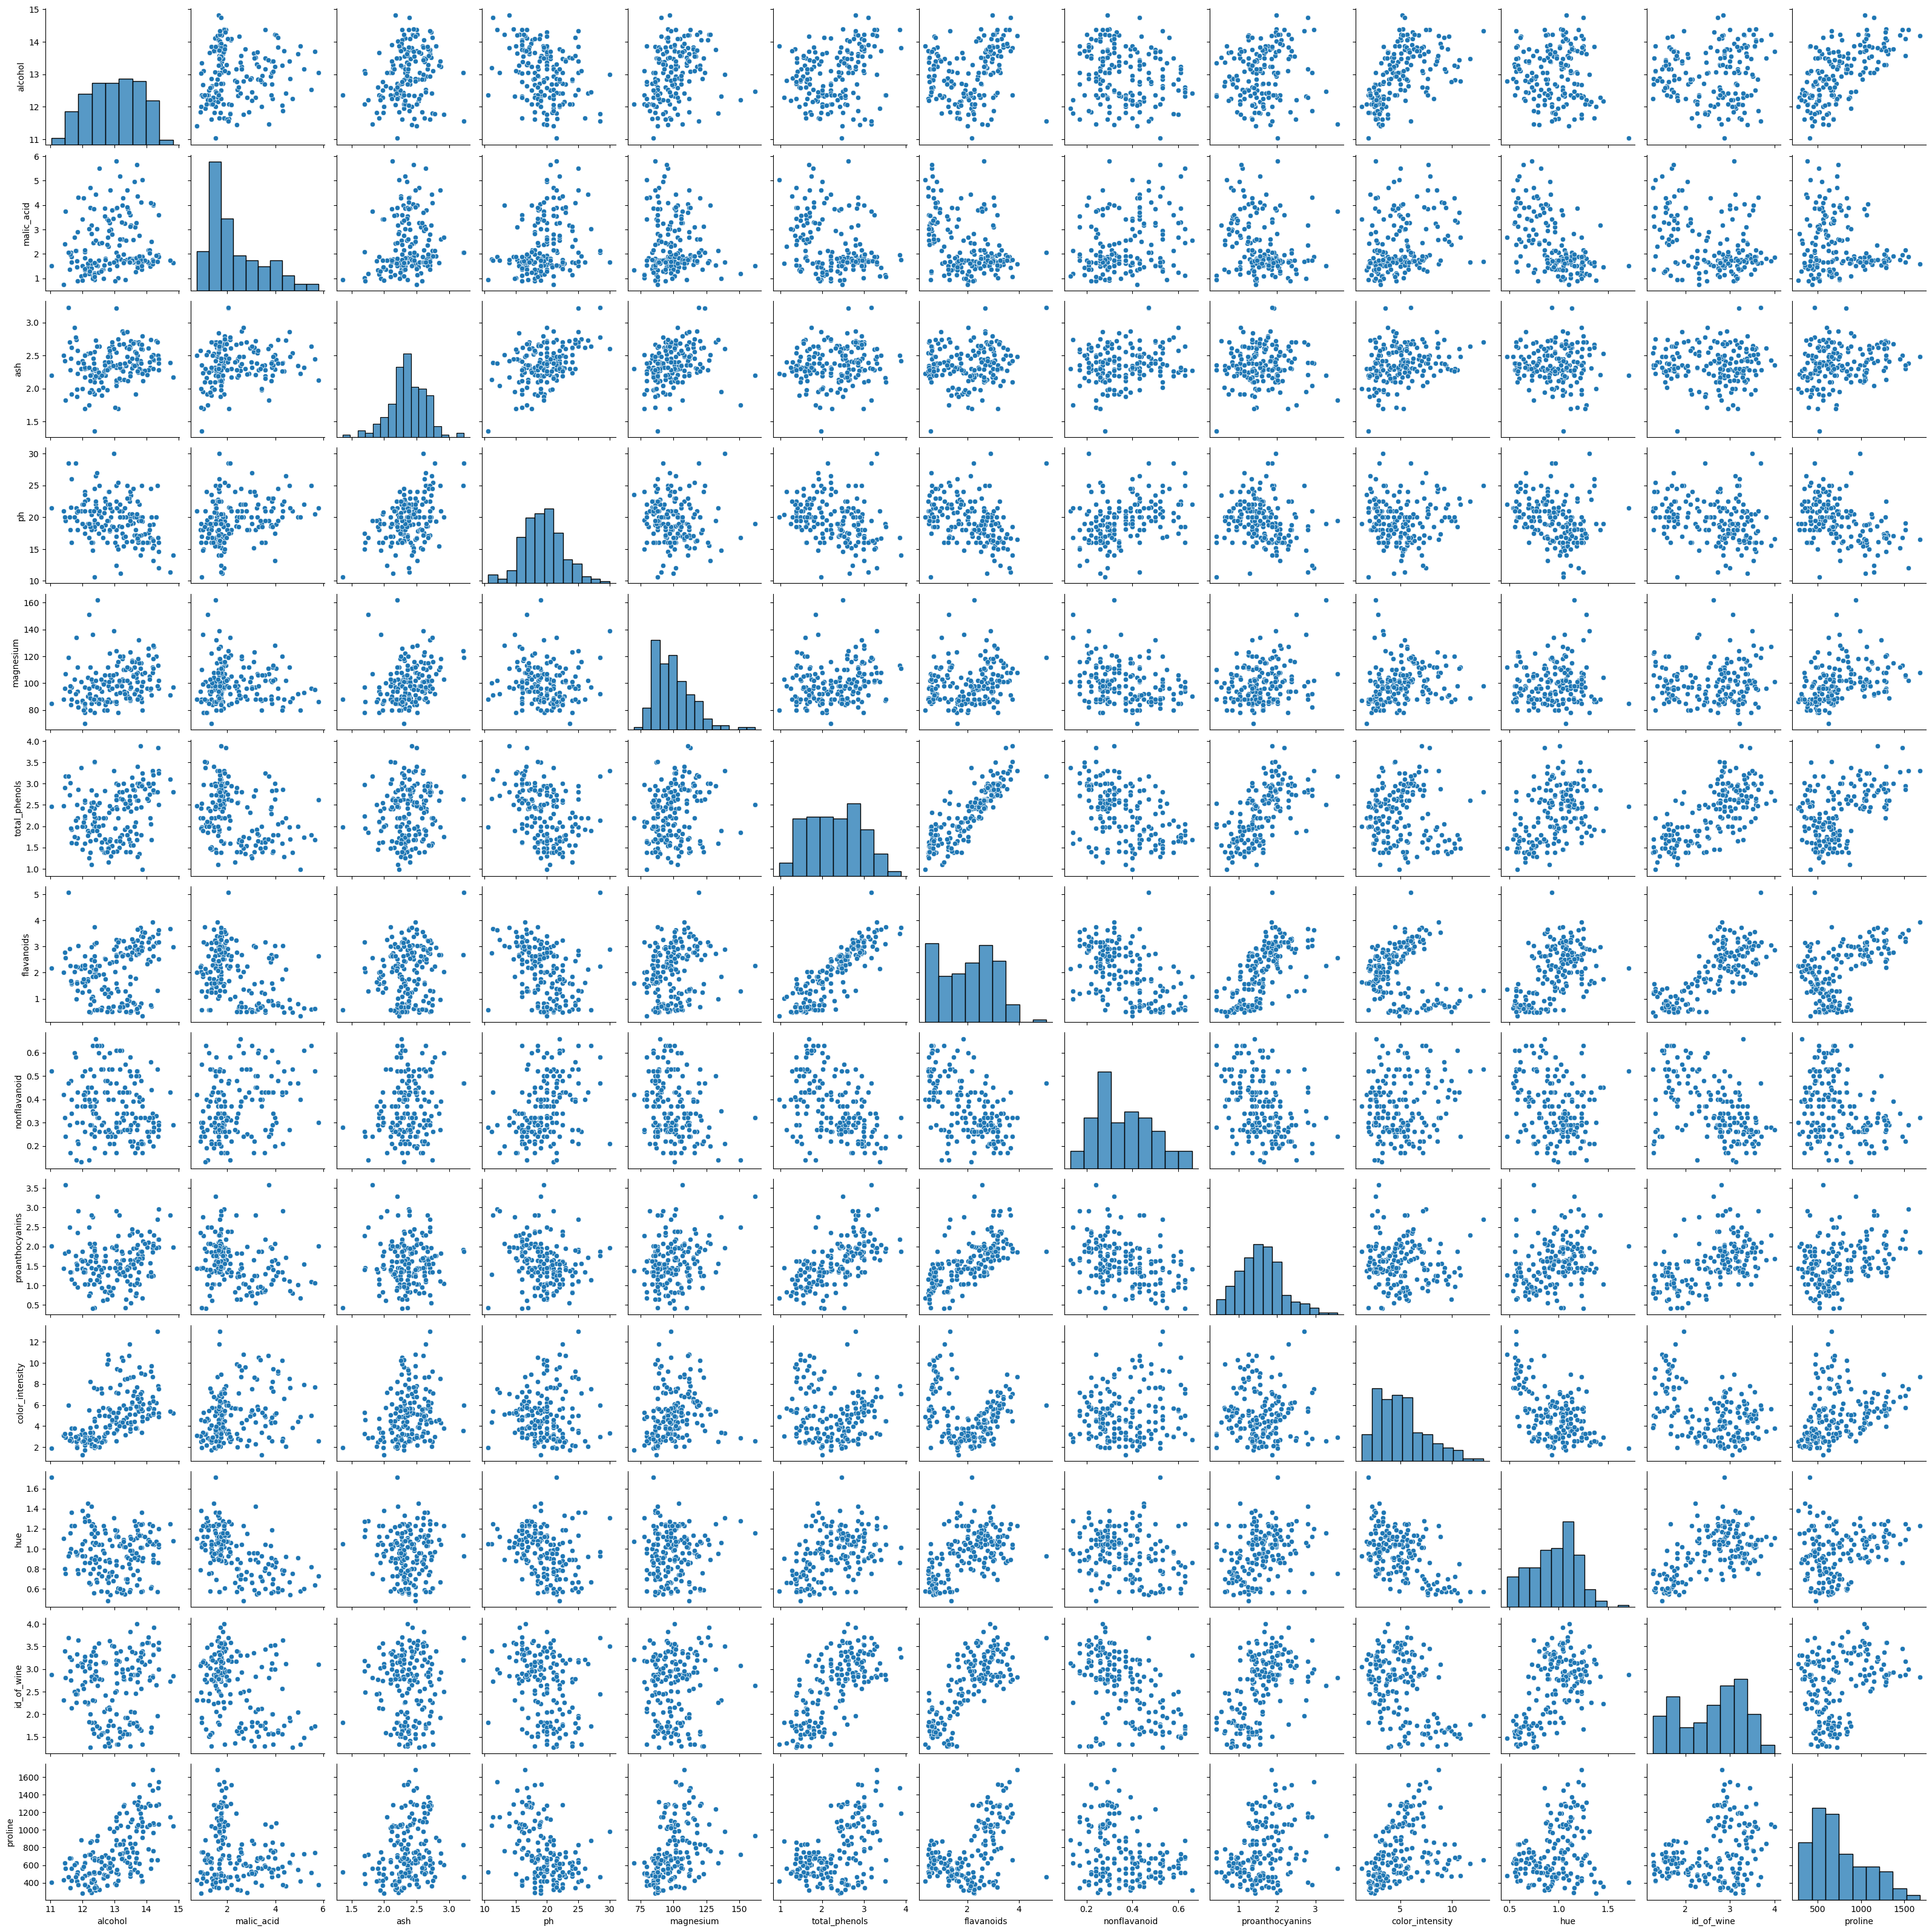

In [263]:
#visualização de informações gerais
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(wine)

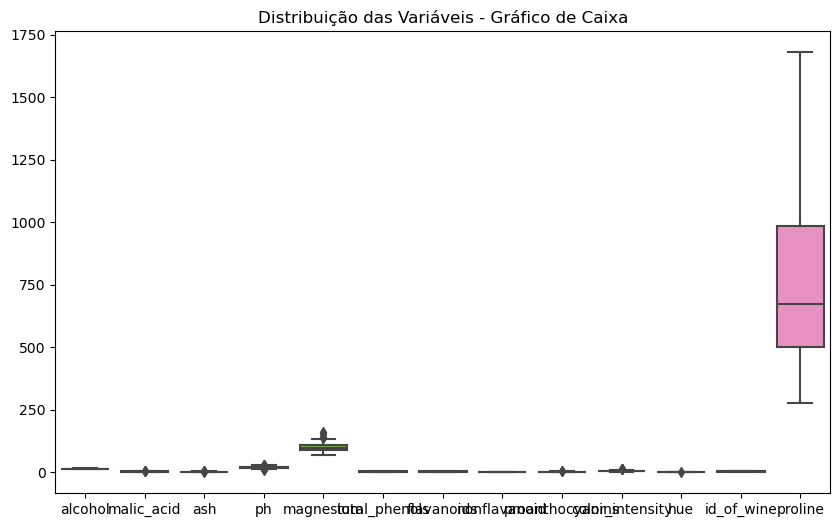

In [264]:
#visualização das distribuição das variáveis

mtp.figure(figsize=(10, 6))

sns.boxplot(data=wine)

mtp.title('Distribuição das Variáveis - Gráfico de Caixa')


mtp.show()


In [266]:
#Separando as variáveis de interesse
wine_sub = wine[['alcohol', 'color_intensity', 'id_of_wine', 'ph']]
wine_sub.columns = ['alcohol', 'color_intensity', 'id_of_wine', 'ph']
wine_sub.head()

,alcohol,color_intensity,id_of_wine,ph
0,14.23,5.64,3.92,15.6
1,13.20,4.38,3.40,11.2
2,13.16,5.68,3.17,18.6
3,14.37,7.80,3.45,16.8
4,13.24,4.32,2.93,21.0


In [267]:
#correlação
wine_sub.corr()

,alcohol,color_intensity,id_of_wine,ph
alcohol,1.000000,0.546364,0.072343,-0.310235
color_intensity,0.546364,1.000000,-0.428815,0.018732
id_of_wine,0.072343,-0.428815,1.000000,-0.276769
ph,-0.310235,0.018732,-0.276769,1.000000


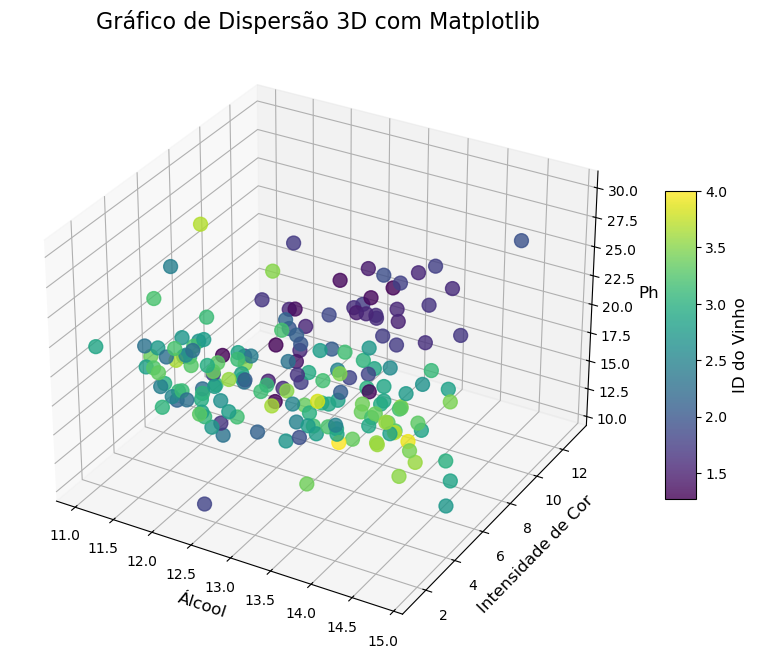

In [271]:
#visualização da dispersão entre os dados da tabela de interesse
import matplotlib.pyplot as mtp
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


# Criando a figura 3D
fig = mtp.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersão
scatter = ax.scatter(
    wine_sub['alcohol'],            # Eixo X
    wine_sub['color_intensity'],    # Eixo Y
    wine_sub['ph'],                # Eixo Z
    c=wine_sub['id_of_wine'],       # Cor baseada na 4ª variável
    cmap='viridis',                 # Paleta de cores
    s=100,                          # Tamanho dos pontos
    alpha=0.8                       # Opacidade
)

# Adicionando rótulos
ax.set_title("Gráfico de Dispersão 3D com Matplotlib", fontsize=16)
ax.set_xlabel("Álcool", fontsize=12)
ax.set_ylabel("Intensidade de Cor", fontsize=12)
ax.set_zlabel("Ph", fontsize=12)

# Adicionando a barra de cores
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('ID do Vinho', fontsize=12)

# Exibir o gráfico
mtp.show()


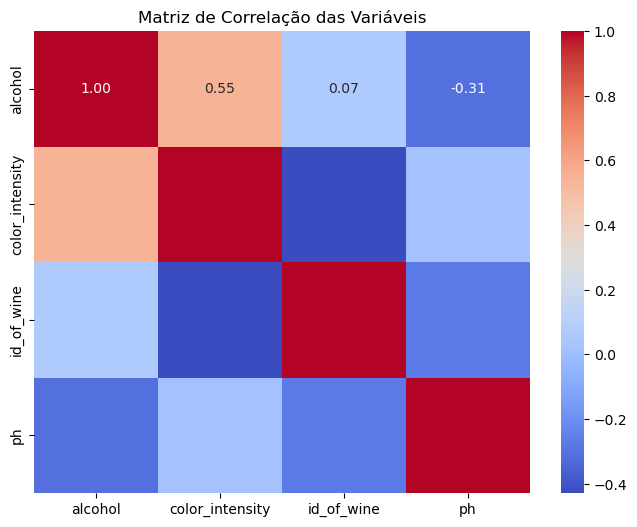

In [272]:
#visualizando dos dados de correlação
import seaborn as sns
import matplotlib.pyplot as plt

correlacao=wine_sub.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlação das Variáveis')

plt.show()
fig.show()

# 6. Machine Learning
Aqui vamos separar os grupos para ver quantos grupos de vinhos nós temos nesta base de dados

In [273]:
#preparação dos dados
def definirnomes (target):
    if(target== 0):
        return 'tipo de uva 1'
    elif (target== 1):
        return 'tipo de uva 2'
    elif (target == 2):
        return 'tipo de uva 3'

Como é uma clusterização não precisamos separar a base entre treinamento e teste. E este o modelo kmeans da biblioteca sklearn
vai fazer vparios grupos e vamos validar qual número de k (ou seja, número de grupos) é o ideal para o dataframe

In [274]:
#clusterização
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances


#clusterização para 3

kmeans3 = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans3.labels_
metrics.silhouette_score(X, labels, metric='euclidean')


#clusterização para 4

kmeans4 = KMeans(n_clusters=4, random_state=1).fit(X)
labels = kmeans4.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

#clusterização para 5

kmeans5 = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans5.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

#clusterização para 6

kmeans6 = KMeans(n_clusters=6, random_state=1).fit(X)
labels = kmeans6.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6549705863891951

Através da visualização do que foi feito anteriormente, podemos ver que k=6 é um número exagerado de grupos 
e que por dividir de mais este resultado é ineficiente, então será descartado da nossa análise

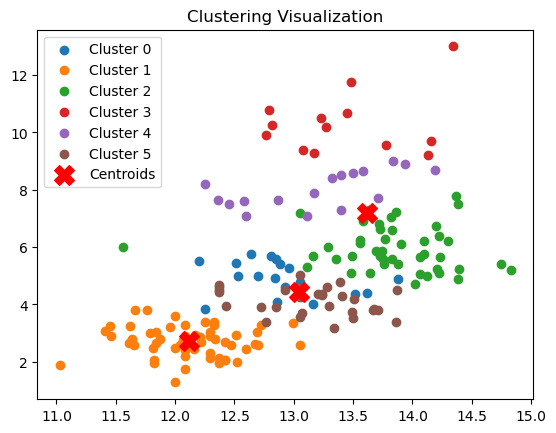

In [275]:
#visualização grafica
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Clusterização para k=3
# Ensure X is a NumPy array
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

# Plotting clusters
for cluster in np.unique(labels):
    cluster_points = X[labels == cluster]  # Assuming `labels` is a NumPy array
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plotting centroids
centroids = kmeans3.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.legend()
plt.title('Clustering Visualization')

plt.show()



Um dos possíveis resultados é o k=4, como podemos ver no gráfico abaixo. 
Diferente do k=6, ele apresenta um resultado mais regular

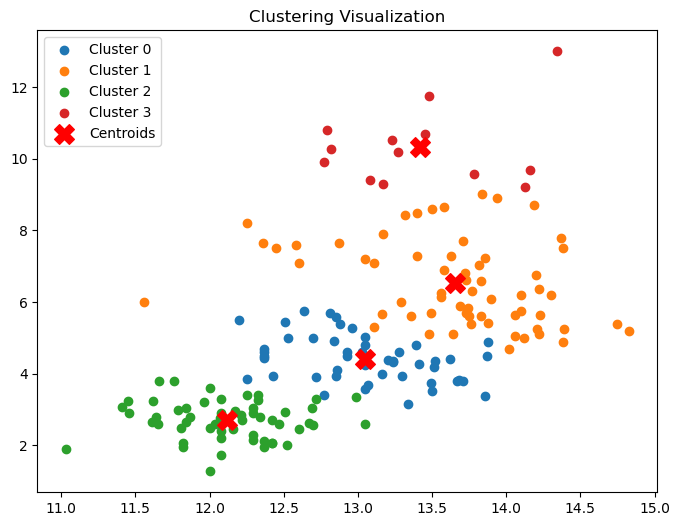

In [276]:
kmeans4 = KMeans(n_clusters=4, random_state=1).fit(X)
labels = kmeans4.labels_
metrics.silhouette_score(X, labels, metric='euclidean')
#para k=4
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

# Visualizando os clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plotando os centróides
centroids = kmeans4.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Configurando o gráfico
plt.legend()
plt.title('Clustering Visualization')
plt.show()

O k=5 tem um resultado ainda mais bem apresentável que o k=4 e que será usado para a validação de qual grupo 
é o mais adequado para a nossa análise

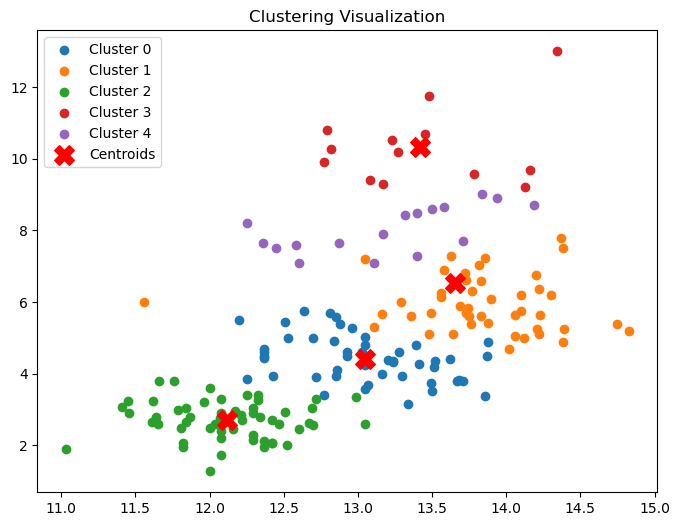

In [277]:
kmeans5 = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans5.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

#para k=5

if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

# Visualizando os clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plotando os centróides
centroids = kmeans4.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Configurando o gráfico
plt.legend()
plt.title('Clustering Visualization')
plt.show()
plt.show()

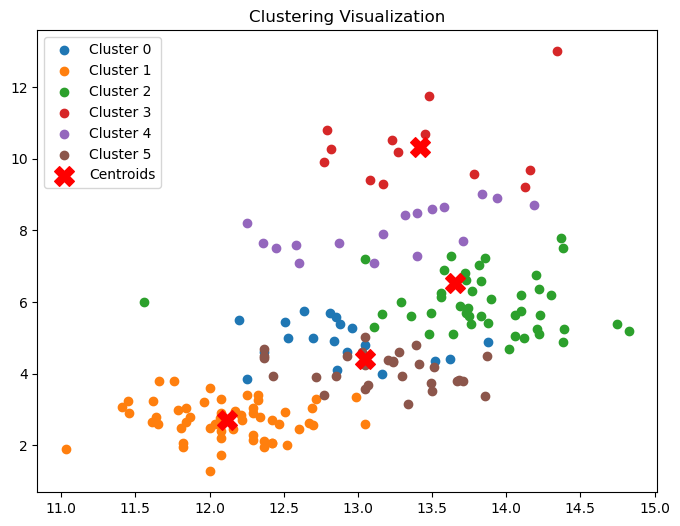

In [278]:
kmeans6 = KMeans(n_clusters=6, random_state=1).fit(X)
labels = kmeans6.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

#para k=6

if isinstance(X, pd.DataFrame):
    X = X.to_numpy()

# Visualizando os clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plotando os centróides
centroids = kmeans4.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Configurando o gráfico
plt.legend()
plt.title('Clustering Visualization')
plt.show()

Para a validação de qual é a quantidade de grupos é a mais adequada para a classificação dos tipo de vinho. 

  Usamos o *Método Silhueta* avalia a qualidade dos clusters formados por algoritmos,que mede a similaridade de um ponto com os outro pontos de seu próprio cluster em comparação com os pontos de clusters diferentes

In [279]:
#aplicação do metódo Elbow method
valores_k= []
inercia= []

for i in range (1,10):
    kmeansi= KMeans(n_clusters=i, random_state=0)
    kmeansi.fit(X)
    labels = kmeansi.labels_
    centroids = kmeansi.cluster_centers_
    valores_k.append(i)
    inercia.append(kmeansi.inertia_)
    print(kmeansi.inertia_)

2489.660652293709
1640.983538725352
1029.4913953633584
555.3953348947744
179.95613412100235
152.5651143274452
133.52696897390982
123.55827869004861
116.33699221960798


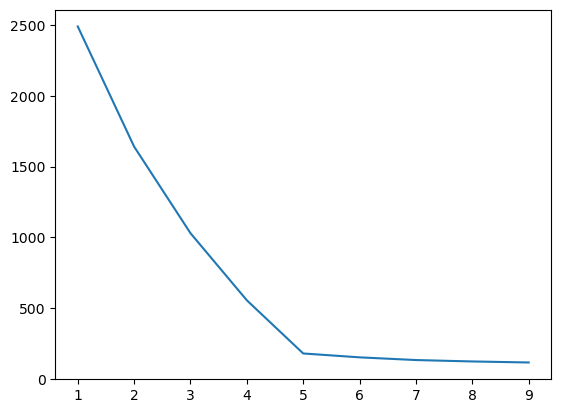

In [280]:
#visualização da relação entre a inercia e k
fig, ax= plt.subplots()

ax.plot(valores_k,inercia)

plt.show()

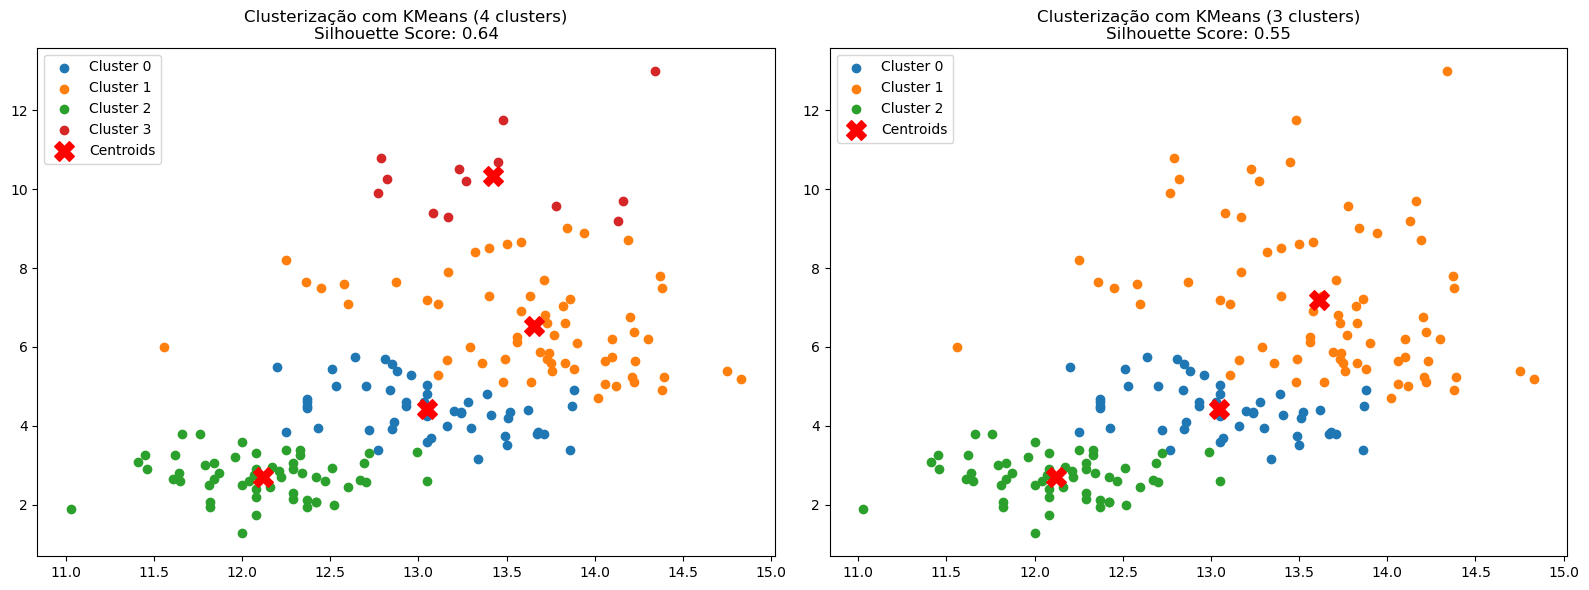

In [281]:
#visualizando k=3 e k=4 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Clusterização para 4 clusters
kmeans4 = KMeans(n_clusters=4, random_state=1).fit(X)
labels4 = kmeans4.labels_
centroids4 = kmeans4.cluster_centers_

# Clusterização para 3 clusters
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(X)
labels3 = kmeans3.labels_
centroids3 = kmeans3.cluster_centers_

# Cálculo do Silhouette Score
silhouette_avg_4 = silhouette_score(X, labels4, metric='euclidean')
silhouette_avg_3 = silhouette_score(X, labels3, metric='euclidean')

# Criando subgráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico para 4 clusters
for cluster in np.unique(labels4):
    cluster_points = X[labels4 == cluster]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
ax1.scatter(centroids4[:, 0], centroids4[:, 1], s=200, c='red', marker='X', label='Centroids')
ax1.set_title(f'Clusterização com KMeans (4 clusters)\nSilhouette Score: {silhouette_avg_4:.2f}')
ax1.legend()

# Gráfico para 3 clusters
for cluster in np.unique(labels3):
    cluster_points = X[labels3 == cluster]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
ax2.scatter(centroids3[:, 0], centroids3[:, 1], s=200, c='red', marker='X', label='Centroids')
ax2.set_title(f'Clusterização com KMeans (3 clusters)\nSilhouette Score: {silhouette_avg_3:.2f}')
ax2.legend()

# Exibindo os gráficos
plt.tight_layout()
plt.show()


In [282]:
#definindo qual é a melhor opção 

from sklearn.metrics import davies_bouldin_score
#para k=3
silhouette_avg = silhouette_score(X, kmeans3.labels_)
print(f"Silhouette Score: {silhouette_avg}")
#para k=4
silhouette_avg = silhouette_score(X, kmeans4.labels_)
print(f"Silhouette Score: {silhouette_avg}")
#para k=5
silhouette_avg = silhouette_score(X, kmeans5.labels_)
print(f"Silhouette Score: {silhouette_avg}")
#para k=6
silhouette_avg = silhouette_score(X, kmeans6.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5464149993395815
Silhouette Score: 0.6373158874556071
Silhouette Score: 0.7397475948135948
Silhouette Score: 0.6549705863891951


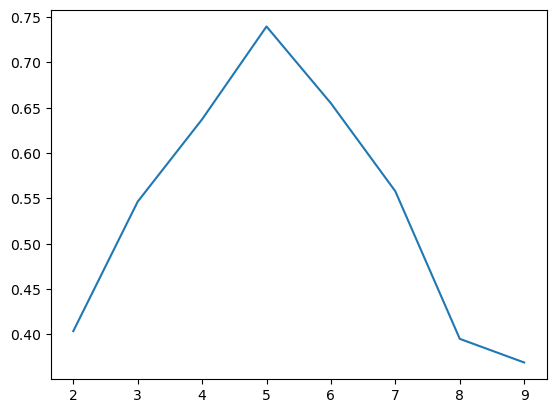

In [283]:
valores_k= []
s= []

for i in range (2,10):
    kmeansi= KMeans(n_clusters=i, random_state=0)
    kmeansi.fit(X)
    labels = kmeansi.labels_
    centroids = kmeansi.cluster_centers_
    valores_k.append(i)
    s.append(silhouette_score(X, kmeansi.labels_))

#visualização da relação entre a s e k
fig, ax= plt.subplots()

ax.plot(valores_k,s)

plt.show()    

In [286]:
import dash
from dash import dcc, html, Input, Output, dash_table
import pandas as pd
import plotly.express as px

# Carregar dados
data =wine_sub

# Ajustar colunas para as especificadas
# Supondo que "id_of_wine" seja um identificador único
if 'id_of_wine' not in data.columns:
    data['id_of_wine'] = range(1, len(data) + 1)

# Renomear colunas para garantir compatibilidade
if 'color intensity' not in data.columns:
    data.rename(columns={'color_intensity': 'color intensity'}, inplace=True)

# Selecionar colunas
data = data[['alcohol', 'color intensity', 'id_of_wine', 'ph']]  # Usar apenas as variáveis especificadas

# Inicializar o app
app = dash.Dash(__name__)
app.title = "Wine Dashboard"

# Estilo padrão com cor vinho
wine_color = '#722f37'
app.layout = html.Div([
    html.H1("Wine Dashboard", style={'textAlign': 'center', 'color': wine_color}),

    # Elemento 1: Gráfico de dispersão
    html.Div([
        dcc.Graph(id='scatter-plot'),
        html.Label("Escolha a variável X para o gráfico de dispersão:", style={'color': wine_color}),
        dcc.Dropdown(
            id='x-axis',
            options=[{'label': col, 'value': col} for col in data.columns if col != 'id_of_wine'],
            value='alcohol',
            clearable=False,
            style={'backgroundColor': wine_color, 'color': 'white'}
        ),
        html.Label("Escolha a variável Y para o gráfico de dispersão:", style={'color': wine_color}),
        dcc.Dropdown(
            id='y-axis',
            options=[{'label': col, 'value': col} for col in data.columns if col != 'id_of_wine'],
            value='color intensity',
            clearable=False,
            style={'backgroundColor': wine_color, 'color': 'white'}
        )
    ], style={'margin': '20px'}),

    # Elemento 2: Gráfico de barras
    html.Div([
        dcc.Graph(id='bar-chart'),
        html.Label("Distribuição da intensidade da cor do vinho", style={'color': wine_color})
    ], style={'margin': '20px'}),

    # Elemento 3: Tabela interativa
    html.Div([
        dash_table.DataTable(
            id='data-table',
            columns=[{"name": col, "id": col} for col in data.columns],
            data=data.to_dict('records'),
            page_size=10,
            style_table={'overflowX': 'auto'},
            style_header={'backgroundColor': wine_color, 'color': 'white'},
            style_data={'backgroundColor': '#f7f7f7', 'color': wine_color}
        ),
    ], style={'margin': '20px'}),

    # Elemento 4: Controle deslizante
    html.Div([
        html.Label("Filtrar vinhos por intensidade de cor:", style={'color': wine_color}),
        dcc.Slider(
            id='color-intensity-slider',
            min=data['color intensity'].min(),
            max=data['color intensity'].max(),
            step=0.1,
            value=data['color intensity'].mean(),
            marks={round(ci, 1): str(round(ci, 1)) for ci in data['color intensity'].unique()[:10]},
            tooltip={'placement': 'bottom', 'always_visible': True}
        )
    ], style={'margin': '20px'}),

    # Elemento 5: Gráfico de pizza
    html.Div([
        dcc.Graph(id='pie-chart'),
        html.Label("Distribuição do Álcool", style={'color': wine_color})
    ], style={'margin': '20px'})
], style={'backgroundColor': '#f9f6f6'})

# Callback para o gráfico de dispersão
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'), Input('y-axis', 'value')]
)
def update_scatter(x_axis, y_axis):
    fig = px.scatter(data, x=x_axis, y=y_axis, color='ph',
                     title=f'{x_axis} vs {y_axis}',
                     color_continuous_scale='reds')
    fig.update_layout(plot_bgcolor='#f9f6f6', paper_bgcolor='#f9f6f6', font_color=wine_color)
    return fig

# Callback para o gráfico de barras
@app.callback(
    Output('bar-chart', 'figure'),
    Input('color-intensity-slider', 'value')
)
def update_bar_chart(color_intensity_value):
    filtered_data = data[data['color intensity'] >= color_intensity_value]
    fig = px.bar(
        filtered_data, x='id_of_wine', y='color intensity',
        title=f'Intensidade da cor para valores >= {color_intensity_value:.1f}',
        labels={"id_of_wine": "ID do Vinho", "color intensity": "Intensidade da Cor"},
        color='color intensity',
        color_continuous_scale='reds'
    )
    fig.update_layout(plot_bgcolor='#f9f6f6', paper_bgcolor='#f9f6f6', font_color=wine_color)
    return fig

# Callback para o gráfico de pizza
@app.callback(
    Output('pie-chart', 'figure'),
    Input('color-intensity-slider', 'value')
)
def update_pie_chart(color_intensity_value):
    filtered_data = data[data['color intensity'] >= color_intensity_value]
    fig = px.pie(
        filtered_data, values='alcohol', names='id_of_wine',
        title='Distribuição do Álcool por Vinho',
        color_discrete_sequence=px.colors.sequential.Reds
    )
    fig.update_layout(plot_bgcolor='#f9f6f6', paper_bgcolor='#f9f6f6', font_color=wine_color)
    return fig

# Rodar o app
if __name__ == '__main__':
    app.run_server(debug=True)

